# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Description

- **PassengerId**: Unique ID given to each passenger
- **Survived**: Survival (0 = No, 1 = Yes)
- **Pclass**: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Name**: Name of the passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of Siblings/Spouse aboard
- **Parch**: Number of Parent/Child aboard
- **Ticket**: Ticket number
- **Fare**: Passenger fare (Bristish Pound)
- **Cabin**: Cabin alloted to the passenger
- **Embarked**: Passenger from which port (S: Southampton, C: Cherbourg, Q: Queenstown)

# Problem Statement

Find factors influencing survival of passengers.

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Handling Missing Values

In [7]:
df1 = df.copy()

In [8]:
df1.duplicated().sum()

np.int64(0)

In [9]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Embarked

In [11]:
# Embarked with null values
df1[df1['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
df1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df1['Embarked'].fillna('S', inplace = True)

In [14]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Cabin

In [15]:
# Null values in Cabin
df1[df1['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
df1.drop(columns = 'Cabin', inplace = True)

## Age

In [17]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

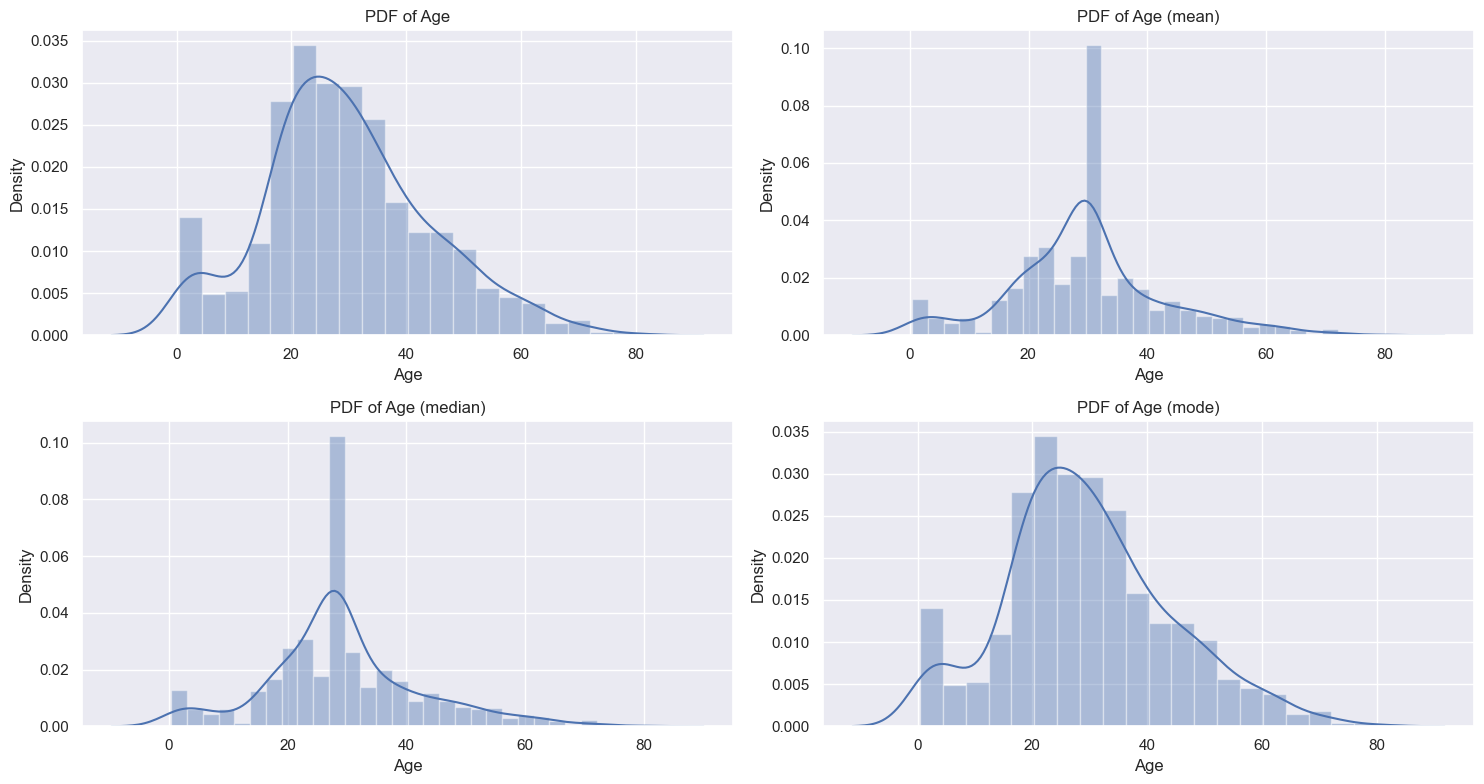

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
ax = ax.flatten()

sns.distplot(df1['Age'], ax = ax[0])
ax[0].set_title('PDF of Age')

sns.distplot(df1['Age'].fillna(df1['Age'].mean()), ax = ax[1])
ax[1].set_title('PDF of Age (mean)')

sns.distplot(df1['Age'].fillna(df1['Age'].median()), ax = ax[2])
ax[2].set_title('PDF of Age (median)')

sns.distplot(df1['Age'].fillna(df1['Age'].mode()), ax = ax[3])
ax[3].set_title('PDF of Age (mode)')

plt.tight_layout()
plt.show()

In [19]:
# Replacing null values with median values
df1['Age'].fillna(df1['Age'].median(), inplace = True)

In [20]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df1.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)

In [22]:
df1.shape

(891, 8)

# EDA

## Univariate Analysis

### Survived

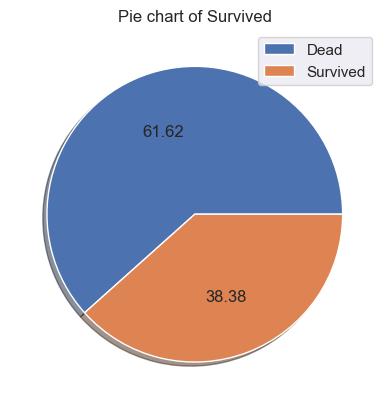

In [23]:
plt.pie(df1['Survived'].value_counts(), autopct = '%0.2f',shadow = True)
plt.legend(['Dead', 'Survived'], loc = 'upper right')
plt.title('Pie chart of Survived');

##### Conclusion

- 61.61% of the passengers died.
- 38.38% of the passengers survived.

### Pclass

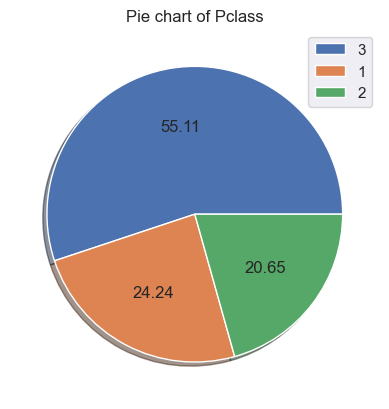

In [24]:
plt.pie(df1['Pclass'].value_counts(), autopct = '%0.2f',shadow = True)
plt.legend((df['Pclass'].value_counts()*100/len(df)).index, loc = 'upper right')
plt.title('Pie chart of Pclass');

##### Conclusion

- 55.11% belong to PClass 3.
- 24.24% belong to PClass 1.
- 20.65% belong to PClass 2.

### Sex

In [25]:
df1['Sex'].value_counts()*100/len(df)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

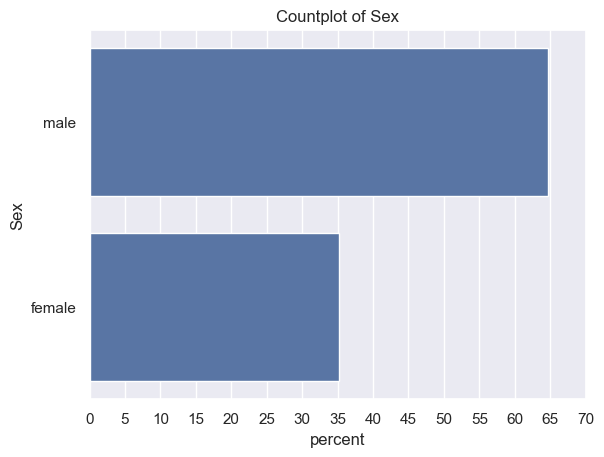

In [26]:
sns.countplot(df1['Sex'], stat = 'percent')
plt.title('Countplot of Sex')
plt.xticks(np.arange(0, 71, 5))
plt.show()

##### Conclusion

- 64.75% of the passengers are males.
- 35.24% of the passengers are females.

### Age

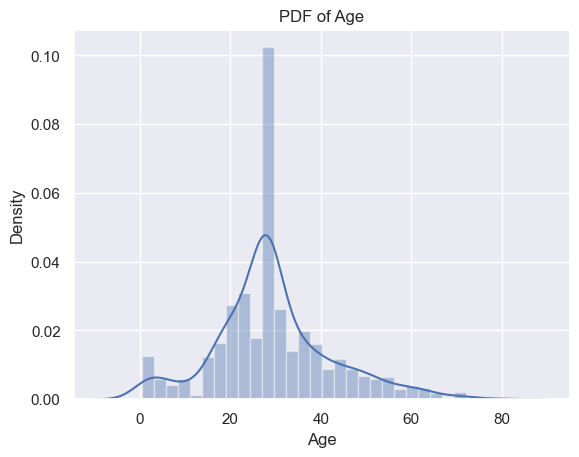

In [27]:
sns.distplot(df1['Age'])
plt.title('PDF of Age')
plt.show()

In [28]:
df1['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
df1['Age'].skew()

np.float64(0.5102446555756495)

##### Conclusion

- 29 is the mean age of the passengers.
- The `Age` column is slightly positively skewed. 

### SibSp

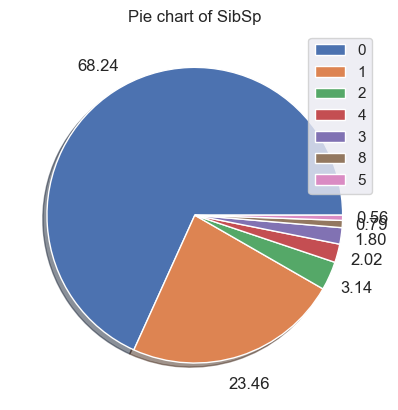

In [30]:
plt.pie(df1['SibSp'].value_counts(), autopct = '%0.2f', pctdistance = 1.2, shadow = True)
plt.legend((df1['SibSp'].value_counts()).index, loc = 'upper right')
plt.title('Pie chart of SibSp');

##### Conclusion

- 68.24% of the passengers travelled alone.
- 23.46% of the passengers travelled with 1 Sibling/Spouse.
- The rest 8.3% travelled with 2 or more Siblings/Spouse.

### Parch

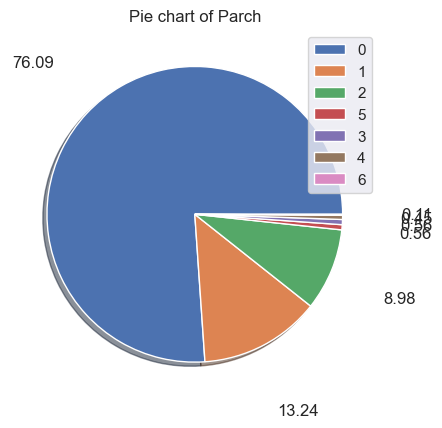

In [31]:
plt.pie(df1['Parch'].value_counts(), autopct = '%0.2f', pctdistance = 1.5, shadow = True)
plt.legend((df1['Parch'].value_counts()).index, loc = 'upper right')
plt.title('Pie chart of Parch');

##### Conclusion

- 76.09% of the passengers didn't accompany anyone.
- 13.24% accompanied 1 Parent/Child.
- The rest 10.66% accompanied 2 and more Parent/Child.

### Fare

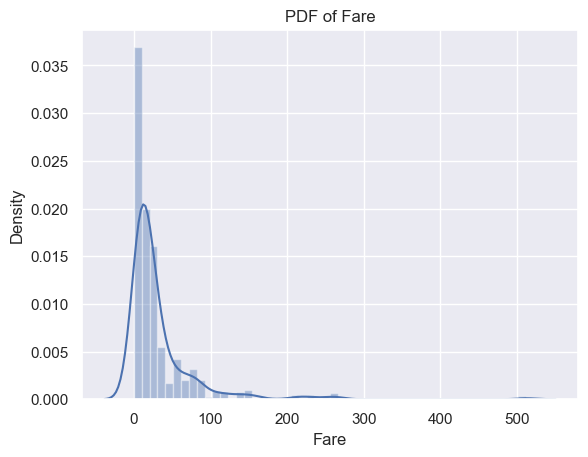

In [32]:
sns.distplot(df1['Fare'])
plt.title('PDF of Fare');

In [33]:
df1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
df1['Fare'].skew()

np.float64(4.787316519674893)

##### Conclusion

- The `Fare` column is highly positively skewed.
- The average fare is 32.2

### Embarked

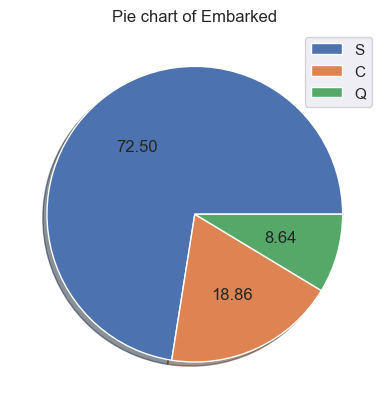

In [35]:
plt.pie(df1['Embarked'].value_counts(), autopct = '%0.2f', shadow = True)
plt.legend((df1['Embarked'].value_counts()).index)
plt.title('Pie chart of Embarked');

##### Conclusion

- 72.5% passengers boarded at Southampton.
- 18.86% passengers boarded at Cherbourg.
- 8.64% passengers boarded at Queenstown.

## Bivariate Analysis

### Survived

#### Survived - Pclass

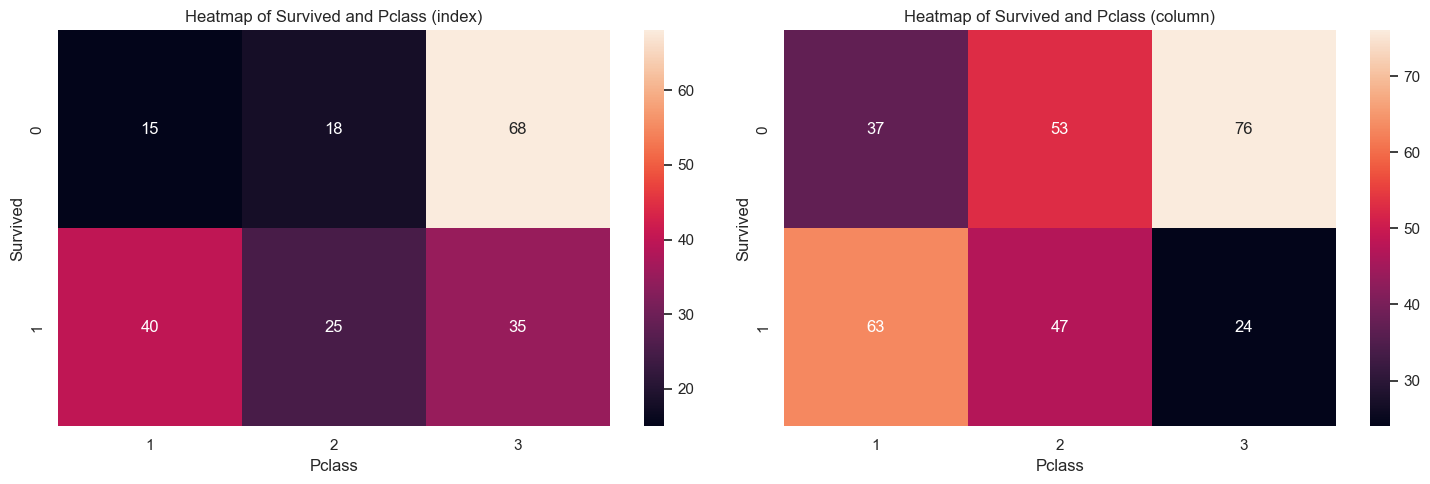

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax = ax.flatten()

sns.heatmap((pd.crosstab(df1['Survived'], df1['Pclass'], normalize = 'index')*100).round(), annot = True, ax = ax[0])
ax[0].set_title('Heatmap of Survived and Pclass (index)')

sns.heatmap((pd.crosstab(df1['Survived'], df1['Pclass'], normalize = 'columns')*100).round(), annot = True, ax = ax[1])
ax[1].set_title('Heatmap of Survived and Pclass (column)')

plt.tight_layout()
plt.show()

##### Conclusion

- Highest number of deaths have occured in Pclass 3 compared to other Pclass.
- Highest number of survivors are in Pclass 1 compared to other Pclass.
- **Pclass 1**: highest number of survivors (63%).
- **Pclass 2**: almost equal number of survivors.
- **Pclass 3**: highest number of passengers who couldn't survive (76%).

#### Survived - Sex

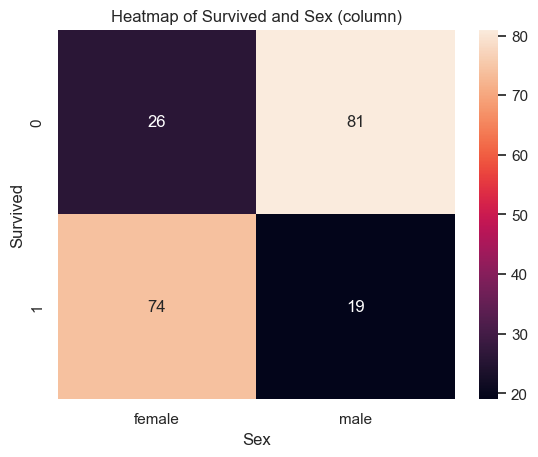

In [37]:
sns.heatmap((pd.crosstab(df1['Survived'], df1['Sex'], normalize = 'columns')*100).round(), annot = True)
plt.title('Heatmap of Survived and Sex (column)')
plt.show()

##### Conclusions

- Higher number of female survivors can be observed.

#### Survived - Age

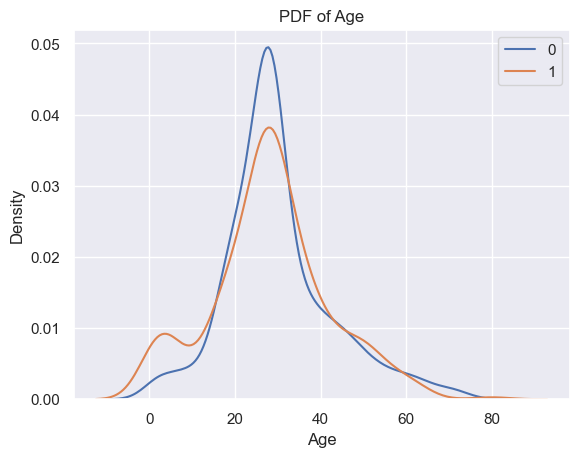

In [38]:
sns.distplot(df1[df1['Survived'] == 0]['Age'], hist = False)
sns.distplot(df1[df1['Survived'] == 1]['Age'], hist = False)
plt.title('PDF of Age')
plt.legend([0, 1])
plt.show()

In [39]:
np.round(df1[df1['Survived'] == 0]['Age'].mean(), 2)

np.float64(30.03)

In [40]:
np.round(df1[df1['Survived'] == 1]['Age'].mean(), 2)

np.float64(28.29)

In [41]:
np.round(df1[(df1['Age'] > 0) & (df1['Age'] <= 20)]['Survived'].mean(), 2)

np.float64(0.46)

In [42]:
np.round(df1[(df1['Age'] > 21) & (df1['Age'] <= 40)]['Survived'].mean(), 2)

np.float64(0.37)

In [43]:
np.round(df1[(df1['Age'] > 41) & (df1['Age'] <= 60)]['Survived'].mean(), 2)

np.float64(0.4)

In [44]:
np.round(df1[(df1['Age'] > 61) & (df1['Age'] <= 80)]['Survived'].mean(), 2)

np.float64(0.26)

##### Conclusion

- The average age of passengers who survived is 28 years.
- The average age of passengers who couldn't survive is 30 years.
- Average survival rate of age group 0-20 is 46%.
- Average survival rate of age group 21-40 is 37%.
- Average survival rate of age group 41-60 is 40%.
- Average survival rate of age group 61-80 is 26%.

#### Survived - SibSp

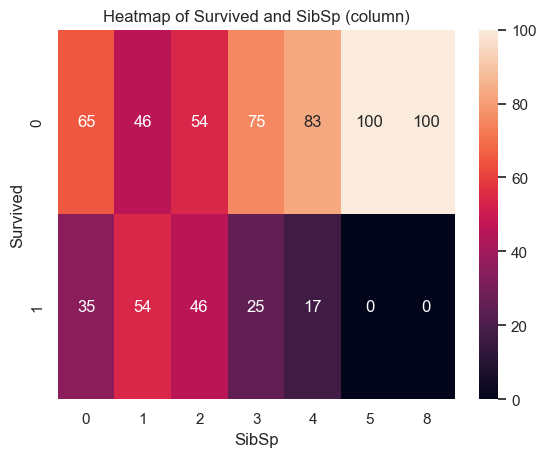

In [45]:
sns.heatmap((pd.crosstab(df1['Survived'], df1['SibSp'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Survived and SibSp (column)')
plt.show()

##### Conclusion

- Survival rate of passengers without Siblings/Spouse is 37%.
- As the number of Sibling/Spouse increases from 1, the survival rate decreases.

#### Survived - Parch

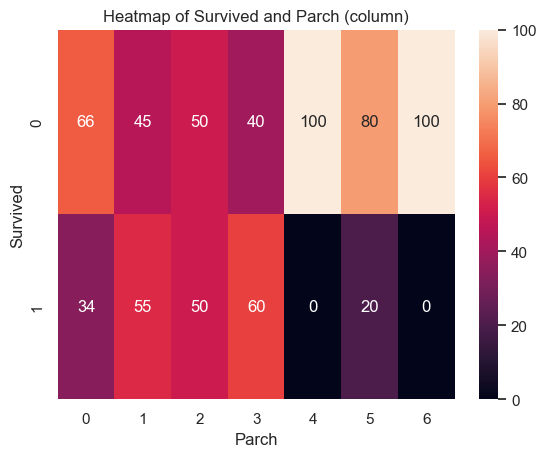

In [46]:
sns.heatmap((pd.crosstab(df1['Survived'], df1['Parch'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Survived and Parch (column)')
plt.show()

##### Conclusion

- Survival rate of passengers with no Parent/Child is 35%.
- Survival rate of passengers with Parent/Child between 1 and 3 remains almost same (average = 57%).
- Survival rate of passengers with Parent/Child between 4 and 6 is significantly low.

#### Survived - Fare

In [47]:
df1[df1['Survived'] == 0]['Fare'].mean()

np.float64(22.117886885245902)

In [48]:
df1[df1['Survived'] == 1]['Fare'].mean()

np.float64(48.39540760233918)

##### Conclusion

- Passengers who survived paid a higher average fare price

#### Survived - Embarked

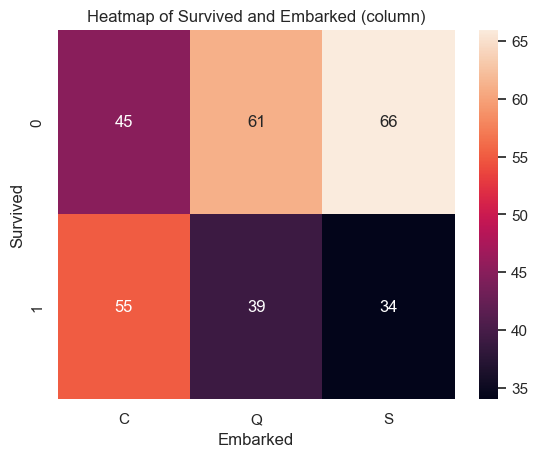

In [49]:
sns.heatmap((pd.crosstab(df1['Survived'], df1['Embarked'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Survived and Embarked (column)')
plt.show()

##### Conclusion

- Survival rate: Cherbourg > Southampton > Queenstown.

### Pclass

#### Pclass - Sex

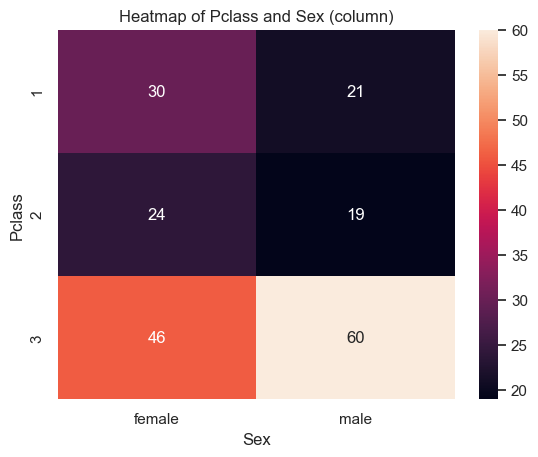

In [50]:
sns.heatmap((pd.crosstab(df1['Pclass'], df1['Sex'], normalize = 'columns')*100).round(), annot = True)
plt.title('Heatmap of Pclass and Sex (column)')
plt.show()

##### Conclusion

- In Pclass 1 and 2 out of the total passengers majority are females.
- In Pclass 3 out of the total passengers majority are males.

#### Pclass - Age

In [51]:
for i in range(1, 4):
    print(f'Average Age of passengers in Pclass {i}: {np.round(df1[df1['Pclass'] == i]['Age'].mean(), 2)}')

Average Age of passengers in Pclass 1: 36.81
Average Age of passengers in Pclass 2: 29.77
Average Age of passengers in Pclass 3: 25.93


##### Conclusion

- Average age of passengers in Pclass 1: 38.11
- Average age of passengers in Pclass 2: 29.88
- Average age of passengers in Pclass 3: 25.14

#### Pclass - SibSp

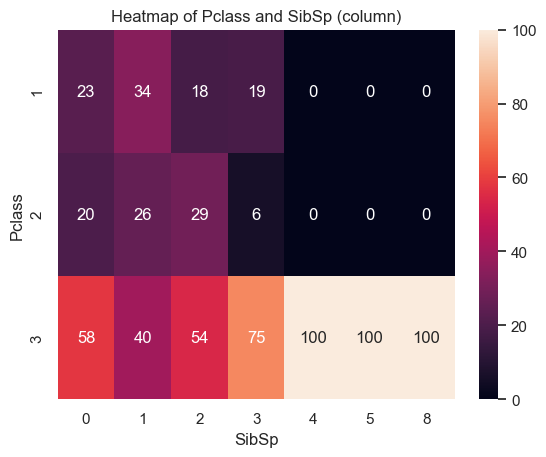

In [52]:
sns.heatmap((pd.crosstab(df1['Pclass'], df1['SibSp'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Pclass and SibSp (column)')
plt.show()

##### Conclusion

- In Pclass 3 as the number of Sibling/Spouse increases, the proportion of passengers also increasea.
- In Pclass 1 and 2 as the number of Sibling/Spouse increases, the proportion of passengers decreases.

#### Pclass - Parch

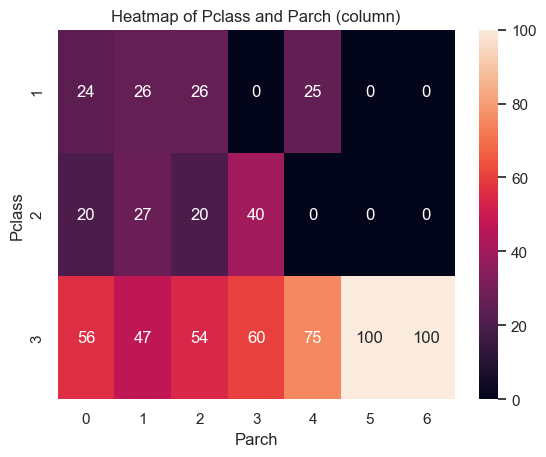

In [53]:
sns.heatmap((pd.crosstab(df1['Pclass'], df1['Parch'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Pclass and Parch (column)')
plt.show()

##### Conclusion

- In Pclass 3 as the number of Parent/Child increases, the proportion of passengers also increases.
- In Pclass 1 and 2 as the number of Parent/Child increases, the proportion of passengers decreases.

#### Pclass - Fare

In [54]:
for i in range(1, 4):
    print(f'Average fare paid by passengers for Pclass {i}: {np.round(df1[df1['Pclass'] == i]['Fare'].mean(), 2)}')

Average fare paid by passengers for Pclass 1: 84.15
Average fare paid by passengers for Pclass 2: 20.66
Average fare paid by passengers for Pclass 3: 13.68


##### Conclusion

- Average fare paid by passengers for Pclass 1: 84.15
- Average fare paid by passengers for Pclass 2: 20.66
- Average fare paid by passengers for Pclass 3: 13.68

$\therefore$  Average fare of Pclass 1 > Average fare of Pclass 2 > Average fare of Pclass 3

#### Pclass - Embarked

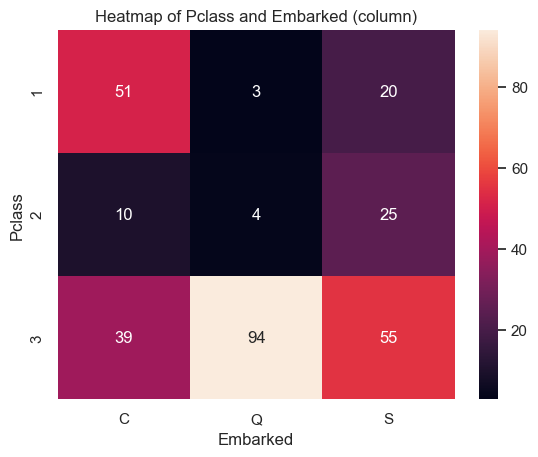

In [55]:
sns.heatmap((pd.crosstab(df1['Pclass'], df1['Embarked'], normalize = 'columns')*100).round(), annot = True, fmt = '0.0f')
plt.title('Heatmap of Pclass and Embarked (column)')
plt.show()

In [56]:
for i in ['S', 'Q', 'C']:
    for j in range(1, 4):
        print(f'Embarked: {i}, Pclass: {j}', end = ' => ')
        print(f'{df1[(df1['Embarked'] == i) & (df1['Pclass'] == j)].count()[0]}')
    print()

Embarked: S, Pclass: 1 => 129
Embarked: S, Pclass: 2 => 164
Embarked: S, Pclass: 3 => 353

Embarked: Q, Pclass: 1 => 2
Embarked: Q, Pclass: 2 => 3
Embarked: Q, Pclass: 3 => 72

Embarked: C, Pclass: 1 => 85
Embarked: C, Pclass: 2 => 17
Embarked: C, Pclass: 3 => 66



##### Conclusion

- Out of all the passengers majority of them baorded at Southampton.
- At Cherbourg majority boarded Pclass 1.
- At Queenstown and Southampton majority boarded Pclass 3.

### Sex

#### Sex - Age

In [57]:
for i in ['male', 'female']:
    print(f'Average age of {i}: {np.round(df1[df1['Sex'] == i]['Age'].mean(), 2)}')

Average age of male: 30.14
Average age of female: 27.93


##### Conclusion

- Average age of male: 30.73
- Average age of female: 27.75

#### Sex - Fare

In [58]:
for i in ['male', 'female']:
    print(f'Average fare of {i}: {np.round(df1[df1['Sex'] == i]['Fare'].mean(), 2)}')

Average fare of male: 25.52
Average fare of female: 44.48


##### Conclusion

- Average fare of male: 27.27
- Average fare of female: 47.33

### Fare

#### Fare - Embarked

In [59]:
np.round(df1[df1['Embarked'] == 'S']['Fare'].mean(), 2)

np.float64(27.24)

In [60]:
np.round(df1[df1['Embarked'] == 'Q']['Fare'].mean(), 2)

np.float64(13.28)

In [61]:
np.round(df1[df1['Embarked'] == 'C']['Fare'].mean(), 2)

np.float64(59.95)

##### Conclusion

- Average fare of passengers who boarded from Southampton is 27.24.
- Average fare of passengers who boarded from Queenstown is 13.28.
- Average fare of passengers who boarded from Cherbourg is 59.95.

# Conclusion

1. **Sex of the passenger**: The sex of the passenger played a crucial role in survival. Females have a higher cahnce of survival.
2. **Fare**: Higher fares were associated with higher survival rates.
3. **Passenger Class**: Pclass 1 has more number of survivors due to the fact that the passenger paid a higher fare for a luxurious experience hence were given priority.
4. **Age**: Younger passengers had a slightly higher survival rate, while older adults had lower survival chances.
5. **Family Size**: Passengers traveling alone had a better survival rate than those in large families.